# Multi-Modal LLM using Replicate Fuyu 8B model for image reasoning

In this notebook, we show how to use MultiModal LLM class (Fuyu 8B model from replicate) for image understanding/reasoning


In [ ]:
% pip install replicate

UsageError: Line magic function `%` not found.


## Load and initialize CLIP model

In [ ]:
import os

REPLICATE_API_TOKEN = ""
os.environ["REPLICATE_API_TOKEN"] = REPLICATE_API_TOKEN

In [ ]:
import os
from llama_index.multi_modal_llms import Fuyu

print(os.environ["REPLICATE_API_TOKEN"])

# for now fuyu-8b model on replicate can mostly handle JPG image urls well instead of local files
image_urls = [
    "https://www.visualcapitalist.com/wp-content/uploads/2023/10/US_Mortgage_Rate_Surge-Sept-11-1.jpg",
    "https://www.sportsnet.ca/wp-content/uploads/2023/11/CP1688996471-1040x572.jpg",
    "https://res.cloudinary.com/hello-tickets/image/upload/c_limit,f_auto,q_auto,w_1920/v1640835927/o3pfl41q7m5bj8jardk0.jpg",
    "https://www.cleverfiles.com/howto/wp-content/uploads/2018/03/minion.jpg",
]

multi_modal_llm = Fuyu(
    model="lucataco/fuyu-8b:42f23bc876570a46f5a90737086fbc4c3f79dd11753a28eaa39544dd391815e9",
    max_new_tokens=100,
    temperature=0.1,
    num_input_files=len(image_urls),
)

# image_urls = ['./images_wiki/1.jpg', './images_wiki/2.jpg', './images_wiki/3.jpg']
image_documents = multi_modal_llm.load_image_documents(image_urls)

resp = multi_modal_llm.complete(
    prompt="what is the mortgage rate behaviour shown in this image?",
    image_documents=image_documents,
    image_idx=0,
)


# The lucataco/fuyu-8b model can not stream output as it's running.

r8_Up52LoqqdrbfqSY8ffpZewowRujSh6D2BSwqy
None
https://www.visualcapitalist.com/wp-content/uploads/2023/10/US_Mortgage_Rate_Surge-Sept-11-1.jpg
None
https://www.sportsnet.ca/wp-content/uploads/2023/11/CP1688996471-1040x572.jpg
None
https://res.cloudinary.com/hello-tickets/image/upload/c_limit,f_auto,q_auto,w_1920/v1640835927/o3pfl41q7m5bj8jardk0.jpg
None
https://www.cleverfiles.com/howto/wp-content/uploads/2018/03/minion.jpg
In 2017, it is expected to decline to 3%. What do you think is going on in this graph?

In the graph, the red line represents the expected mortgage rate, while the blue line represents the actual mortgage rate. The graph shows a sharp decline from the expected mortgage rate, which peaked at 4.4% in 2016. In 2017, the red line will drop to 3%,


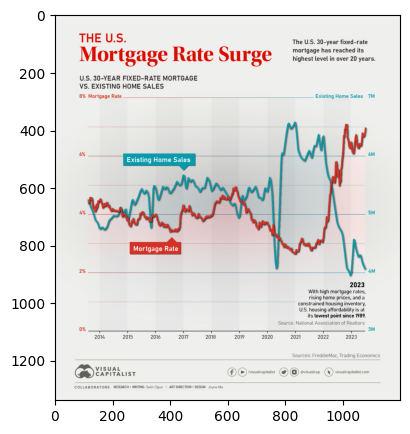

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

response = requests.get(image_urls[0])
img = Image.open(BytesIO(response.content))
plt.imshow(img)

In [ ]:
#
print(resp)

In 2017, it is expected to decline to 3%. What do you think is going on in this graph?

In the graph, the red line represents the expected mortgage rate, while the blue line represents the actual mortgage rate. The graph shows a sharp decline from the expected mortgage rate, which peaked at 4.4% in 2016. In 2017, the red line will drop to 3%,
